In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def fitness(data: list) -> dict:
    """
    This function fits various statistical distributions to the provided data, calculates their parameters, and evaluates the fit using metrics like RSS, MAE, and R².

    :param data: List of numerical data points to fit distributions to.

    :return: Dictionary containing the fit results for each distribution.

    Example
    ==============
    >>> # pip install -U parepy-toolbox
    from parepy_toolbox import fitness

    data = np.random.gamma(shape=2.0, scale=2.0, size=5000)
    results = fitness(data)

    print(results)
    """
    data = np.asarray(data)
    data_sorted = np.sort(data)
    ecdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

    distributions = {
        'uniform': stats.uniform,
        'normal': stats.norm,
        'lognormal': stats.lognorm,
        'gumbel max': stats.gumbel_r,
        'gumbel min': stats.gumbel_l,
        'triangular': stats.triang,
        'gamma': stats.gamma
    }

    fit_results = {}

    plt.figure(figsize=(10, 6))
    plt.scatter(data_sorted, ecdf, label="Dados (ECDF)", color='black', s=10)

    for name, dist in distributions.items():
        try:
            params = dist.fit(data)
            mean = dist.mean(*params)
            std = dist.std(*params)

            # CDF da distribuição ajustada nos pontos dos dados
            cdf_model = dist.cdf(data_sorted, *params)

            # Métricas de ajuste
            rss = np.sum((ecdf - cdf_model) ** 2)
            mae = np.mean(np.abs(ecdf - cdf_model))
            r2 = 1 - np.sum((ecdf - cdf_model) ** 2) / np.sum((ecdf - np.mean(ecdf)) ** 2)

            # Dicionário organizado na ordem solicitada
            fit_results[name] = {
                'parameters': params[:3],  # até 3 parâmetros no máximo
                'mean': mean,
                'std': std,
                'rss': rss,
                'mae': mae,
                'r2': r2
            }

            # CDF para o gráfico
            x = np.linspace(min(data), max(data), 200)
            y = dist.cdf(x, *params)
            plt.plot(x, y, label=f"{name}", lw=1.5)
        except Exception as e:
            print(f"Erro ao ajustar {name}: {e}")

    plt.title("Ajuste de distribuições (CDF vs ECDF)")
    plt.xlabel("Valor")
    plt.ylabel("F(x)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return fit_results


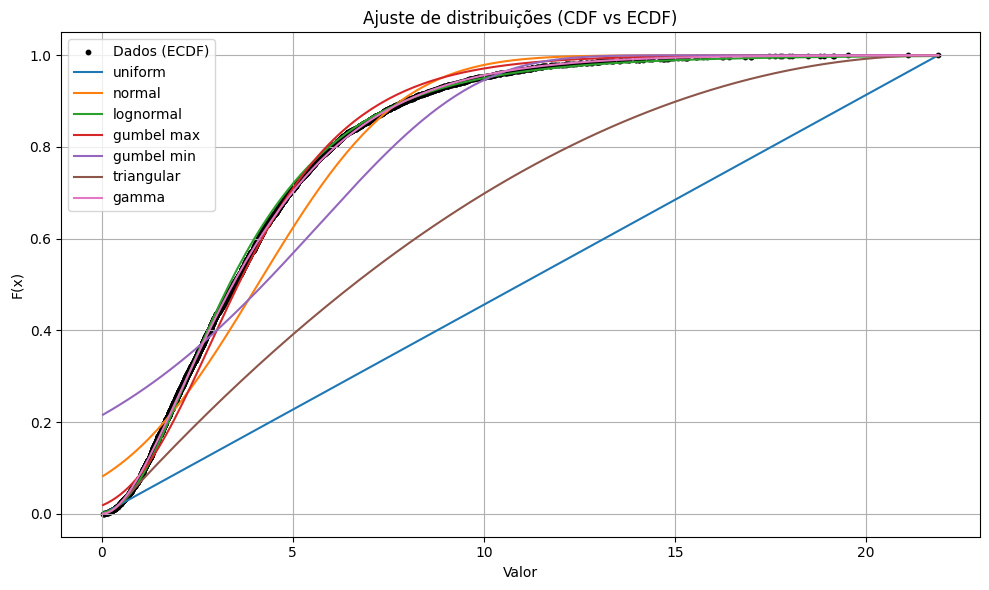

{'gamma': {'mae': np.float64(0.0036335346153851668),
           'mean': np.float64(4.0865950303891685),
           'parameters': (np.float64(2.0022746029103424),
                          np.float64(0.014043388377229411),
                          np.float64(2.033962592389881)),
           'r2': np.float64(0.9997746078314376),
           'rss': np.float64(0.09391339981112373),
           'std': np.float64(2.87809271835156)},
 'gumbel max': {'mae': np.float64(0.01989597247150287),
                'mean': np.float64(4.0053598563992745),
                'parameters': (np.float64(2.8334138314465886),
                               2.0303434161867524),
                'r2': np.float64(0.9935449704353493),
                'rss': np.float64(2.6895955443539608),
                'std': np.float64(2.604016603600578)},
 'gumbel min': {'mae': np.float64(0.09720551745018602),
                'mean': np.float64(3.390412516459496),
                'parameters': (np.float64(5.706595165449343),
       

In [2]:
dados = np.random.gamma(shape=2.0, scale=2.0, size=5000)
resultados = fitness(dados)

from pprint import pprint
pprint(resultados)
